# Ejercicio 2

## a)
 Si el **curr_hp** es más chico a la hora de instanciar el pokemon, entonces el término *(**max_hp** * 3 - **curr_hp** * 2)* en la expresión del numerador para el cálculo del **capture_rate** será más grande, lo que hará que el valor del numerador en general sea más grande, y por lo tanto, aumentará el valor de **capture_rate**.

Por lo tanto, si **curr_hp** es más chico, es más probable que se capture al pokemon si se mantienen constantes los demás factores (como el **catch_rate**, **ball_rate**, **status**, **noise**, etc.). Sin embargo, es importante tener en cuenta que el efecto del **curr_hp** en la tasa de captura puede ser mitigado por otros factores en la expresión, como los ya mencionados anteriormente.

## b)

Lo mencionado en el punto a) lo veremos reflejado en un gráfico de barras que comparará la posibilidad de capturar los pokemones MewTwo, Onix y Caterpie, utilizando los siguientes porcentajes de vida: 20%, 40%, 60%, 80% y 100%.
Los demas valores se mantendrán constantes, y todo se realizará con la pokeball estándar para que no influyan otros factores.

Se utilizaran MewTwo y Caterpie, pues son los valores extremos en cuanto a posibilidad de ser atrapados, y Onix como un valor intermedio entre ambos.

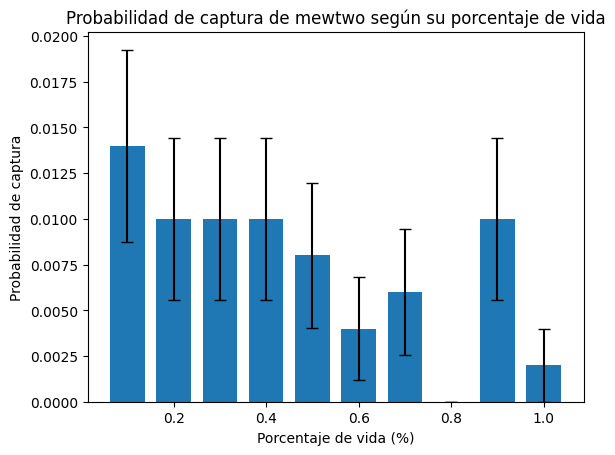

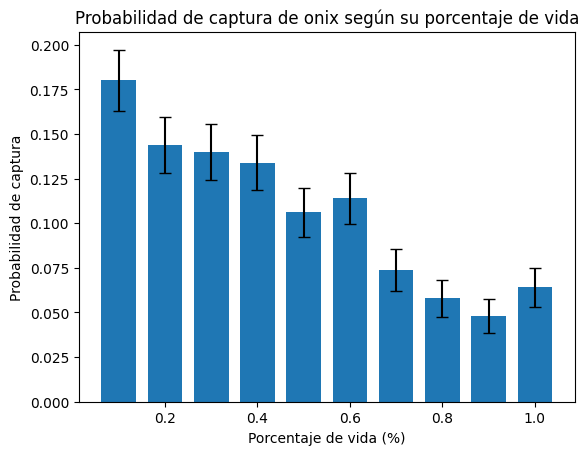

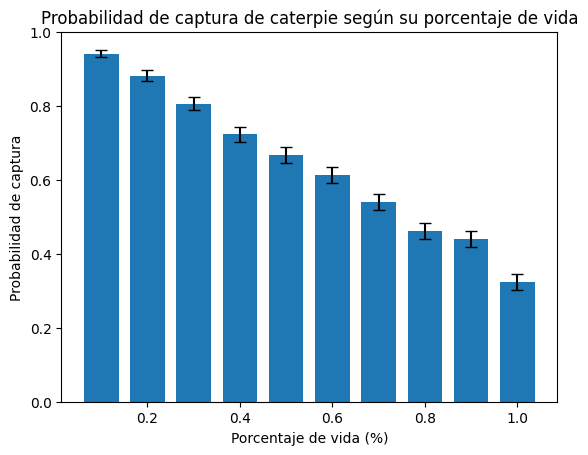

In [8]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
from src.images import get_image, offset_image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

factory = PokemonFactory("pokemon.json")
healths = np.arange(0.1, 1.1, 0.1)
LEVEL = 100
POKEMONS_NAMES = ['mewtwo', 'onix', 'caterpie']
STD_POKEBALL = 'pokeball'

for poke_name in POKEMONS_NAMES:
    capture_rates = []
    std_errors = []
    for health in healths:
        capture_attempts = []
        current_poke = factory.create(poke_name, LEVEL, StatusEffect.NONE, health)
        for i in range(500):
            capture_attempts.append(attempt_catch(current_poke, STD_POKEBALL)[0])
    
        capture_rate = sum(capture_attempts) / len(capture_attempts)
        capture_rates.append(capture_rate)
        std_error = np.std(capture_attempts) / np.sqrt(len(capture_attempts))
        std_errors.append(std_error)

    #Creamos el data frame donde almacenamos todos los datos que se van a graficar
    data = pd.DataFrame({'health': healths, 'capture_rate': capture_rates})

    #Creamos el grafico de barras con las respectivas barras de errores
    plt.bar(data['health'], data['capture_rate'], yerr=std_errors, capsize=4, width=0.075)
    plt.title(f'Probabilidad de captura de {poke_name} según su porcentaje de vida')
    plt.xlabel('Porcentaje de vida (%)')
    plt.ylabel('Probabilidad de captura')
    plt.show()

Como se puede apreciar en los gráficos, se ve como la tasa de captura desciende de forma más o menos lineal a medida que el porcentaje de salud crece.

En el caso de MewTwo los valores no descienden de manera constante debido a su bajo catch_rate, pero en los otros dos pokemones 
elegidos, se ve una tendencia descendente más lineal en los porcentajes de captura, validando lo expresado en el punto 2.a).

## c)
En el archivo catching.py podemos ver la siguiente ecuación que es la encargada de devolver la posibilidad de que se capture o no un pokemon.

max_hp = math.floor(0.01 * (2 * base_hp) + level + 10)

round(((1 + (max_hp * 3 - curr_hp * 2) * catch_rate * ball_rate * status) / ( max_hp * 3)) / 256, 4) * noise_multiplier

Es decir, podemos resumir la expresión general de probabilidad de captura de un pokemon en la siguiente ecuación:

![Ecuacion de probabilidad de captura](img/ecuation.png)

Sabiendo que la **ball_rate** y **noise_multiplier** son independientes de los parámetros intrínsecos del pokemon, se podría suponer que los valores que más determinan si un pokemon es capturado o no son: **base_hp**, **level**, **curr_hp**, **catch_rate** y **status**.

En los puntos a) y b) se vio como el porcentaje de salud afecta la posibilidad de captura. 

Ahora veremos como el **level** y la **base_hp** (y por lo tanto la **max_hp**) afectan al porcentaje de captura. Para eso usaremos a Jolteon y Onix de ejemplos, ya que su **catch_rate** es igual pero su **base_hp** es de 35 y 65 respectivamente. Nuevamente, usaremos la pokeball estándar para evitar que influya en los valores de captura.

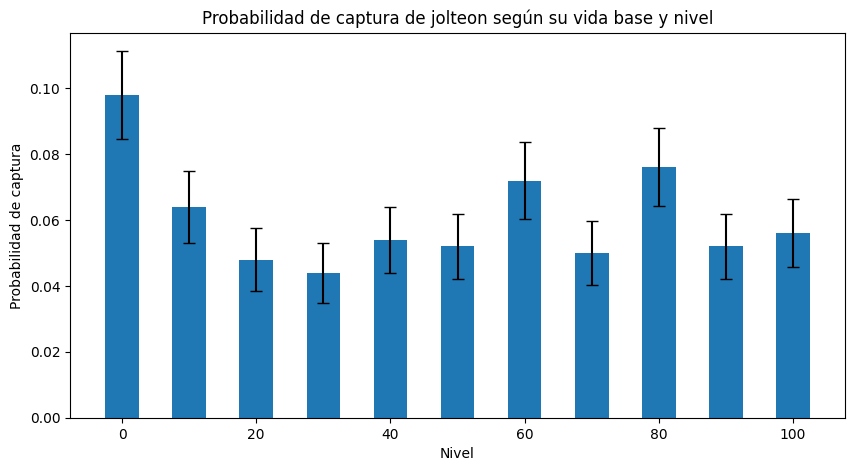

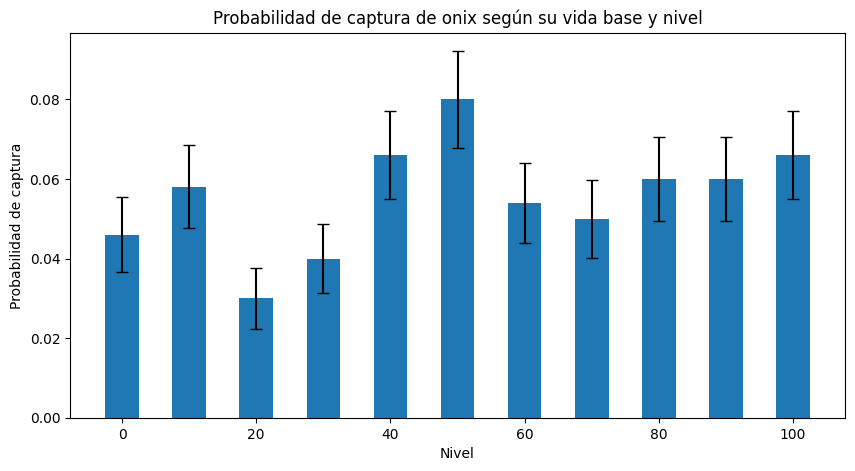

In [9]:
levels = np.arange(0, 101, 10)
POKEMONS_NAMES = ['jolteon', 'onix']
HP = 1

for poke_name in POKEMONS_NAMES:
    capture_rates = []
    std_errors = []
    for level in levels:
        capture_attempts = []
        current_poke = factory.create(poke_name, level, StatusEffect.NONE, HP)
        for i in range(500):
            capture_attempts.append(attempt_catch(current_poke, STD_POKEBALL)[0])
    
        capture_rate = sum(capture_attempts) / len(capture_attempts)
        capture_rates.append(capture_rate)
        std_error = np.std(capture_attempts) / np.sqrt(len(capture_attempts))
        std_errors.append(std_error)
    
    #Creamos el data frame donde almacenamos todos los datos que se van a graficar
    data = pd.DataFrame({'level': levels, 'capture_rate': capture_rates})

    #Creamos el grafico de barras con las respectivas barras de errores
    plt.figure(figsize=(10, 5))
    plt.bar(data['level'], data['capture_rate'], yerr=std_errors, capsize=4, width=5)
    plt.title(f'Probabilidad de captura de {poke_name} según su vida base y nivel')
    plt.xlabel('Nivel')
    plt.ylabel('Probabilidad de captura')
    plt.show()

Contrario a lo que supusimos, el **level** y la **base_hp** no afectaron realmente el porcentaje de captura a lo largo de los distintos niveles de un mismo pokemon. Esto se debe a que como no se modifica el **current_hp**, estos términos de la ecuación se mantienen casi constantes a medida que el nivel aumenta.

Sin embargo se puede apreciar que la posibilidad de atrapar a Jolteon es, en promedio, superior a la de Onix, ya que la **base_hp** del primero es menor.

Por último, falta probar como es que los distintos **status** posibles afectan el porcentaje de captura. Usaremos para ello todos los posibles estados, teniendo en cuenta que los estados POISON, BURN y PARALYSIS, y FREEZE y SLEEP son de igual valor, siendo estos en 1.5 y 2 respectivamente. Haremos la prueba con Jolteon y Onix de nivel 100 y pokeball estándar.

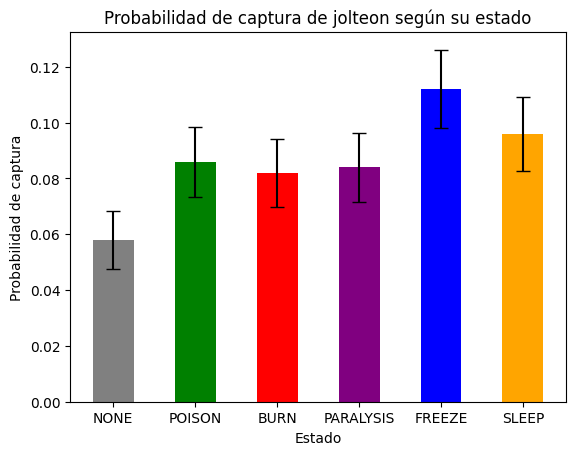

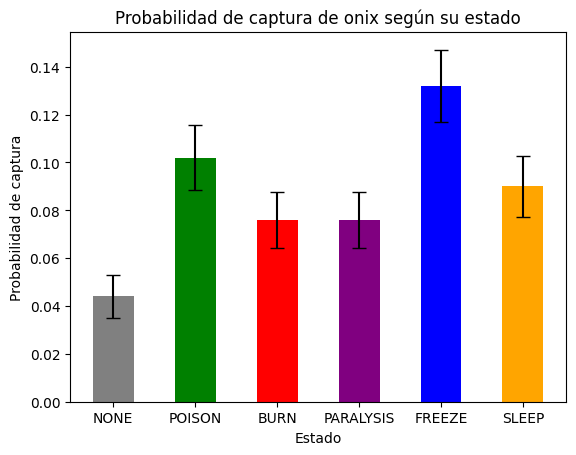

In [10]:
POKEMONS_NAMES = ['jolteon', 'onix']
STATUS_ARRAY = [StatusEffect.NONE, StatusEffect.POISON, StatusEffect.BURN,
                StatusEffect.PARALYSIS, StatusEffect.FREEZE, StatusEffect.SLEEP]
COLORS = ['grey', 'green', 'red', 'purple', 'blue', 'orange']

for poke_name in POKEMONS_NAMES:
    capture_rates = []
    std_errors = []
    for status in STATUS_ARRAY:
        capture_attempts = []
        current_poke = factory.create(poke_name, LEVEL, status, HP)
        for i in range(500):
            capture_attempts.append(attempt_catch(current_poke, STD_POKEBALL)[0])

        capture_rate = sum(capture_attempts) / len(capture_attempts)
        capture_rates.append(capture_rate)
        std_error = np.std(capture_attempts) / np.sqrt(len(capture_attempts))
        std_errors.append(std_error)

    fig, ax = plt.subplots()
    #Creamos el data frame donde almacenamos todos los datos que se van a graficar
    data = pd.DataFrame({'status': [status.name for status in STATUS_ARRAY], 'capture_rate': capture_rates})

    #Creamos el grafico de barras con las respectivas barras de errores
    plt.bar(data['status'], data['capture_rate'], yerr=std_errors, capsize=5, width=0.5, color=COLORS)
    
    plt.title(f'Probabilidad de captura de {poke_name} según su estado')
    plt.xlabel('Estado')
    plt.ylabel('Probabilidad de captura')
    plt.show()

Podemos apreciar una clara tendencia a que la posibilidad de captura aumente en aquellos estados en que los multiplicadores que modifican dicha posibilidad son superiores.

Con esto, ya hemos probado como es que los distintos parámetros modificables de un pokemon (nivel, estado y vida actual) afectan a su tasa de captura, graficando las distintas pruebas realizadas.

## d)
Tomaremos como ejemplos a Snorlax y Jolteon, que incrementan su posibilidad de ser atrapados por la HeavyBall y FastBall respectivamente, debido a su características base de peso y velocidad, como se ha analizado en el puntno 1. a). 
Modificaremos los parámetros **curr_hp**, que ya hemos visto que altera la capacidad de ser atrapado, y veremos como se compara para todas las pokebolas.

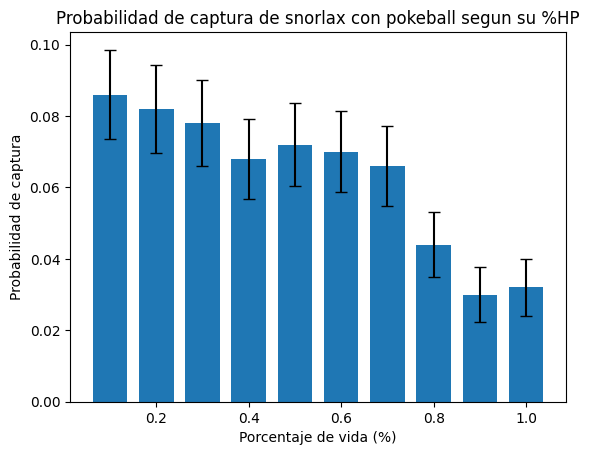

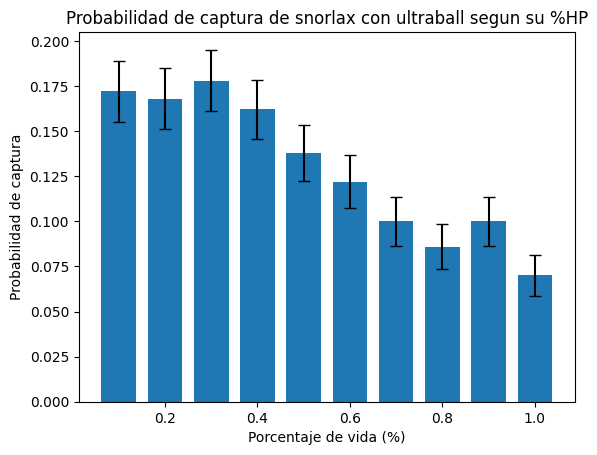

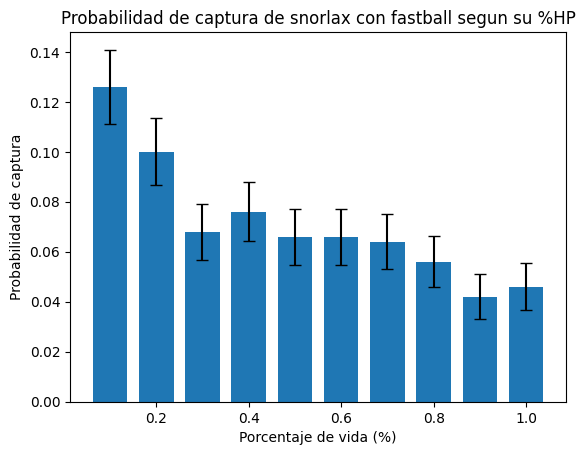

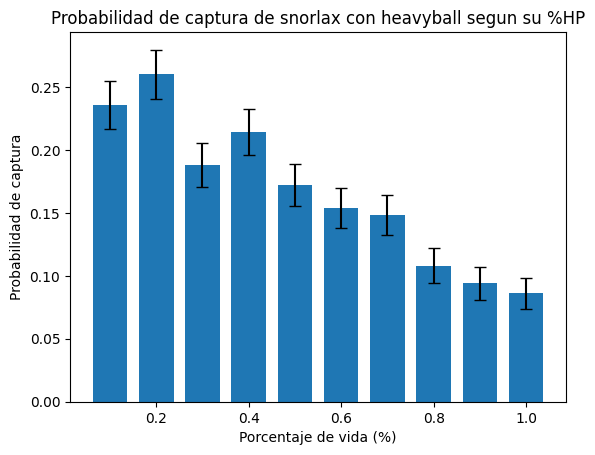

In [11]:
healths = np.arange(0.1,1.1,0.1)
POKEBALLS = ["pokeball", "ultraball", "fastball", "heavyball"]
SNORLAX = 'snorlax'

for pokeball in POKEBALLS:
    capture_rates = []
    std_errors = []
    for health in healths:
        capture_attempts = []
        current_poke = factory.create(SNORLAX, LEVEL, StatusEffect.NONE, health)
        for i in range(500):
            capture_attempts.append(attempt_catch(current_poke, pokeball)[0])
    
        capture_rate = sum(capture_attempts) / len(capture_attempts)
        capture_rates.append(capture_rate)
        std_error = np.std(capture_attempts) / np.sqrt(len(capture_attempts))
        std_errors.append(std_error)
    
    #Creamos el data frame donde almacenamos todos los datos que se van a graficar
    data = pd.DataFrame({'health': healths, 'capture_rate': capture_rates})

    #Creamos el grafico de barras con las respectivas barras de errores
    plt.bar(data['health'], data['capture_rate'], yerr=std_errors, capsize=4, width=0.075)
    plt.title(f'Probabilidad de captura de {SNORLAX} con {pokeball} segun su %HP')
    plt.xlabel('Porcentaje de vida (%)')
    plt.ylabel('Probabilidad de captura')
    plt.show()

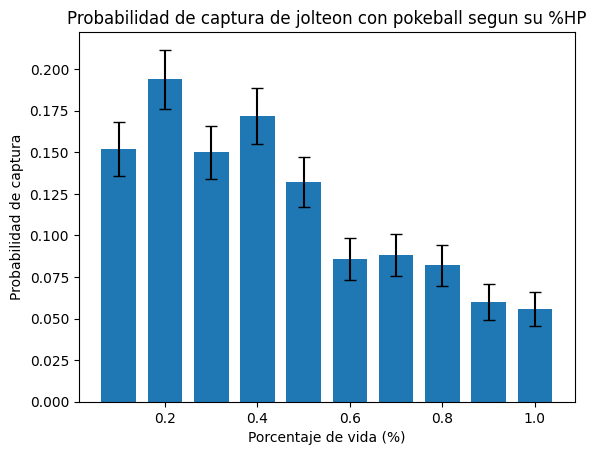

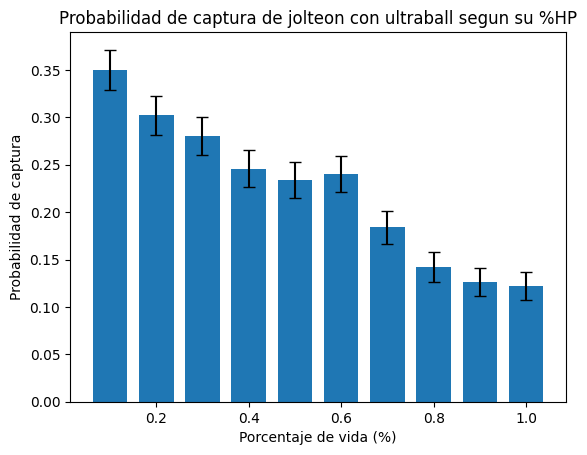

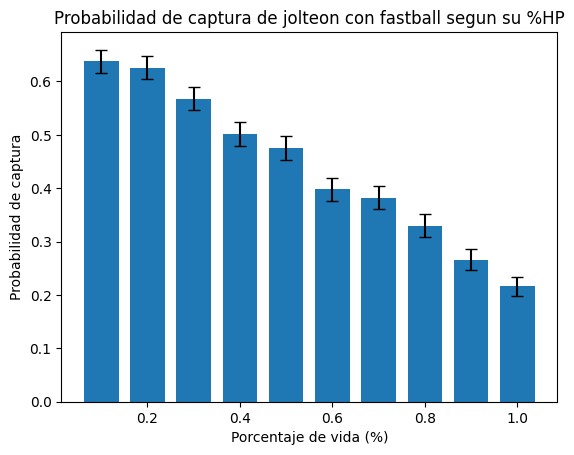

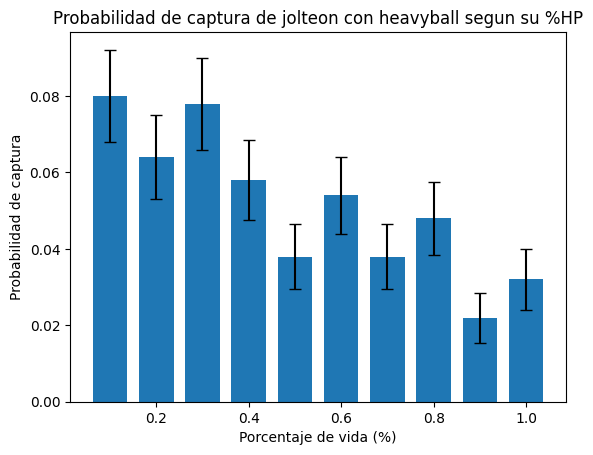

In [12]:
JOLTEON = 'jolteon'

for pokeball in POKEBALLS:
    capture_rates = []
    std_errors = []
    for health in healths:
        capture_attempts = []
        current_poke = factory.create(JOLTEON, LEVEL, StatusEffect.NONE, health)
        for i in range(500):
            capture_attempts.append(attempt_catch(current_poke, pokeball)[0])
    
        capture_rate = sum(capture_attempts) / len(capture_attempts)
        capture_rates.append(capture_rate)
        std_error = np.std(capture_attempts) / np.sqrt(len(capture_attempts))
        std_errors.append(std_error)
    
    #Creamos el data frame donde almacenamos todos los datos que se van a graficar
    data = pd.DataFrame({'health': healths, 'capture_rate': capture_rates})

    #Creamos el grafico de barras con las respectivas barras de errores
    plt.bar(data['health'], data['capture_rate'], yerr=std_errors, capsize=4, width=0.075)
    plt.title(f'Probabilidad de captura de {JOLTEON} con {pokeball} segun su %HP')
    plt.xlabel('Porcentaje de vida (%)')
    plt.ylabel('Probabilidad de captura')
    plt.show()

Como planteamos originalmente, las pokeballs que se relacionan directamente con los pokemon elegido claramente arrojan un índice de probabilidad de captura superior.

Únicamente modificamos la variable de curr_hp ya que por puntos anteriores vimos que era la que tenía mayor impacto en la posibilidad de atrapar o no un pokemon, por sobre el status y el nivel del mismo.

## e)
De forma análoga al ítem anterior, tomaremos nuevamente como ejemplos a Snorlax y Jolteon, pero modificando su **level** 
y comparándolos con todas las pokebolas.

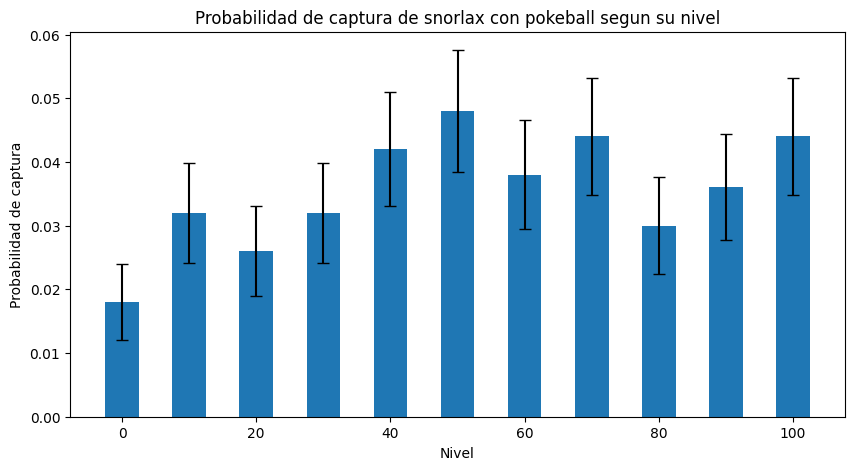

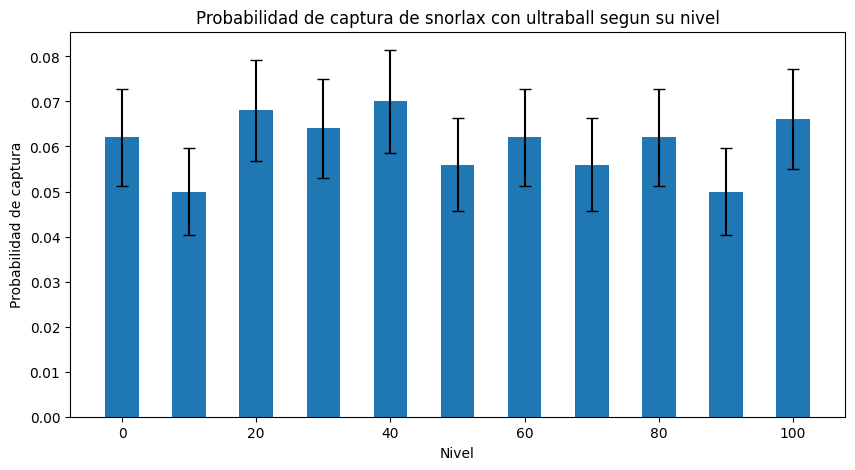

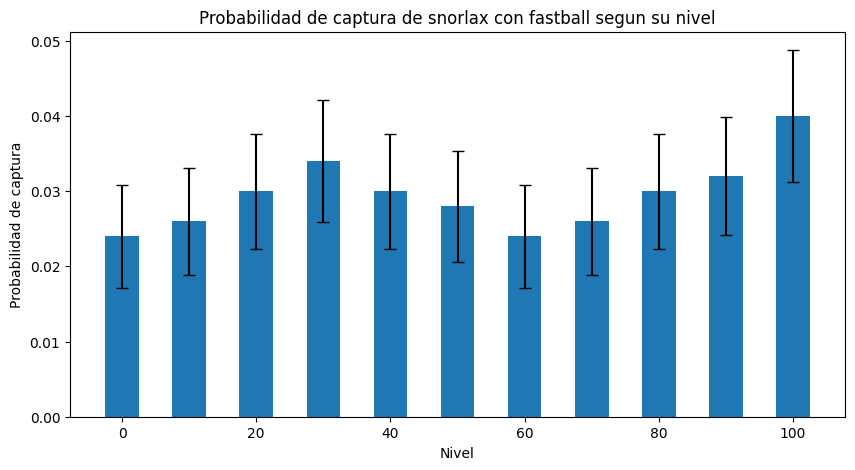

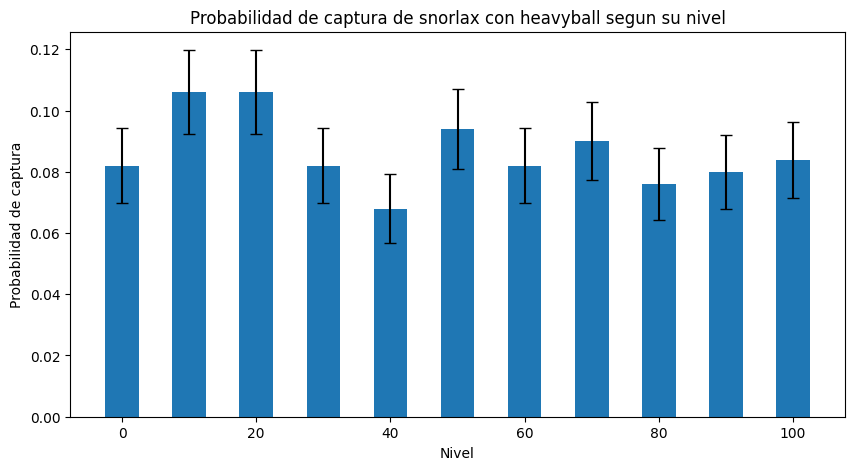

In [13]:
for pokeball in POKEBALLS:
    capture_rates = []
    std_errors = []
    for level in levels:
        capture_attempts = []
        current_poke = factory.create(SNORLAX, level, StatusEffect.NONE, HP)
        for i in range(500):
            capture_attempts.append(attempt_catch(current_poke, pokeball)[0])
    
        capture_rate = sum(capture_attempts) / len(capture_attempts)
        capture_rates.append(capture_rate)
        std_error = np.std(capture_attempts) / np.sqrt(len(capture_attempts))
        std_errors.append(std_error)
    
    #Creamos el data frame donde almacenamos todos los datos que se van a graficar
    data = pd.DataFrame({'level': levels, 'capture_rate': capture_rates})

    #Creamos el grafico de barras con las respectivas barras de errores
    plt.figure(figsize=(10, 5))
    plt.bar(data['level'], data['capture_rate'], yerr=std_errors, capsize=4, width=5)
    plt.title(f'Probabilidad de captura de {SNORLAX} con {pokeball} segun su nivel')
    plt.xlabel('Nivel')
    plt.ylabel('Probabilidad de captura')
    plt.show()

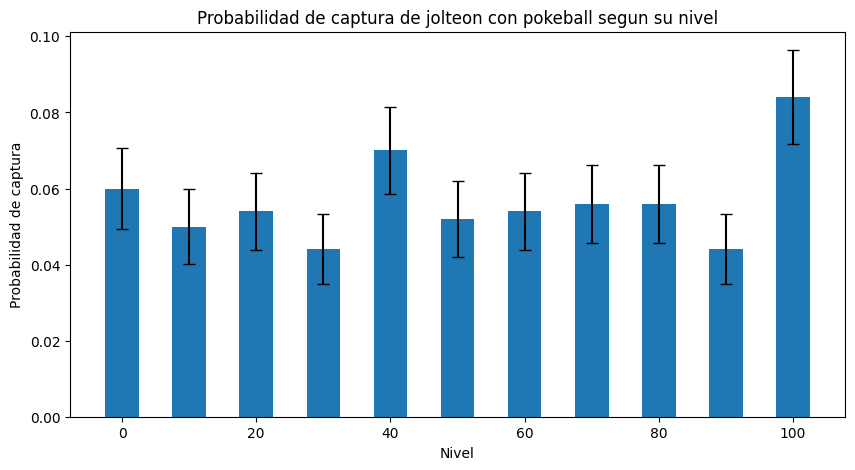

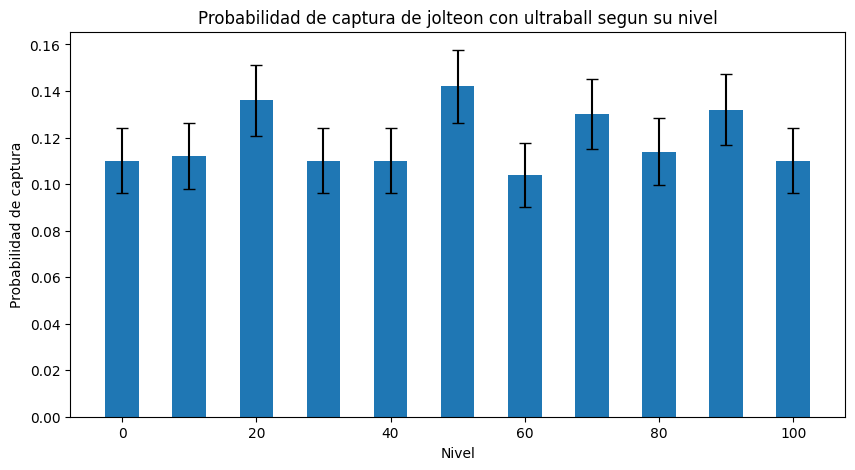

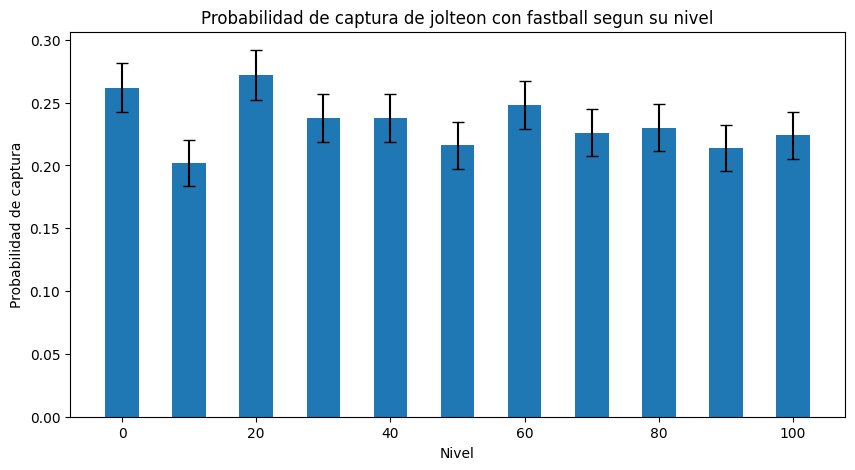

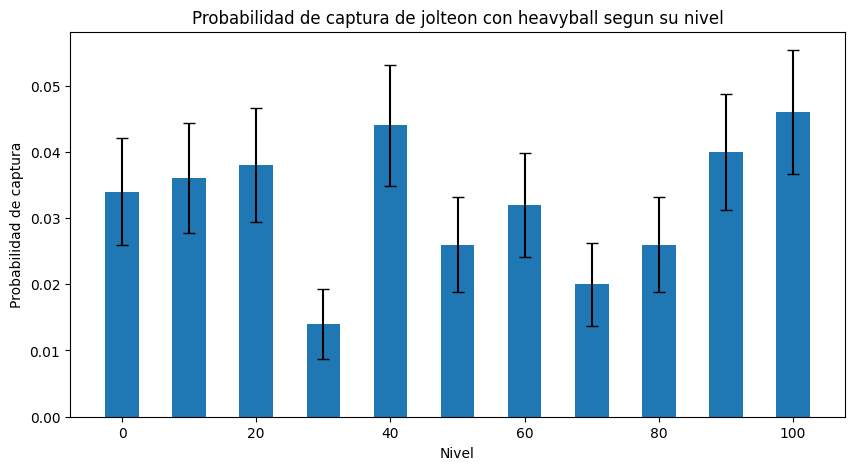

In [14]:
for pokeball in POKEBALLS:
    capture_rates = []
    std_errors = []
    for level in levels:
        capture_attempts = []
        current_poke = factory.create(JOLTEON, level, StatusEffect.NONE, HP)
        for i in range(500):
            capture_attempts.append(attempt_catch(current_poke, pokeball)[0])
    
        capture_rate = sum(capture_attempts) / len(capture_attempts)
        capture_rates.append(capture_rate)
        std_error = np.std(capture_attempts) / np.sqrt(len(capture_attempts))
        std_errors.append(std_error)
    
    #Creamos el data frame donde almacenamos todos los datos que se van a graficar
    data = pd.DataFrame({'level': levels, 'capture_rate': capture_rates})

    #Creamos el grafico de barras con las respectivas barras de errores
    plt.figure(figsize=(10, 5))
    plt.bar(data['level'], data['capture_rate'], yerr=std_errors, capsize=4, width=5)
    plt.title(f'Probabilidad de captura de {JOLTEON} con {pokeball} segun su nivel')
    plt.xlabel('Nivel')
    plt.ylabel('Probabilidad de captura')
    plt.show()

Podemos ver nuevamente que el nivel no afecta demasiado la posibilidad de atrapar un pokemon, pero que aún así se tiene la misma constancia anterior según los tipos de pokeball utilizados para Jolteon y Snorlax